# 🩺 Heart Disease: A Journey from Data to Diagnosis 
### *Can we predict a heart attack before it happens?*

---

![Heart Image](https://stockcake.com/i/robot-holding-heart_857491_787899)
## 📖 The Story
Imagine you are a doctor. You have hundreds of patients, and you want to know who is at high risk of heart disease. Instead of guessing, we use **Data Science**. 

In this notebook, I will take you on a journey. We will look at medical records, find hidden patterns, and build a "Smart Assistant" (Machine Learning Model) that can help save lives.

### 🌟 What makes this notebook special?
* **Simple English:** No "Robotic" talk. Just clear explanations.
* **Visual Storytelling:** We don't just look at numbers; we look at the "Why" behind them.
* **Clean Code:** Written like a pro, but easy for a beginner to follow.


---

## 🔍 Step 2: Understanding the Medical "Clues"

To predict heart disease, we need to understand what each column represents. Since we are using the **UCI Heart Disease Dataset**, here is a simple breakdown of the features we will use:

| Feature Name | Full Description | Simple "Human" Explanation |
| :--- | :--- | :--- |
| **age** | Patient's age in years | Does the risk increase as we get older? |
| **sex** | Gender (1 = Male, 0 = Female) | Are men at higher risk than women? |
| **cp** | Chest Pain Type (Values 1-4) | How intense is the chest pain? |
| **trestbps** | Resting Blood Pressure | Is high BP putting extra strain on the heart? |
| **chol** | Serum Cholesterol (mg/dl) | How much "fat" or blockage is in the blood? |
| **fbs** | Fasting Blood Sugar > 120 mg/dl | Does the patient have high sugar levels? |
| **restecg** | Resting ECG results | Is the heart's electrical rhythm normal? |
| **thalch** | Max Heart Rate Achieved | How well does the heart pump under stress? |
| **exang** | Exercise Induced Angina | Does physical activity cause chest pain? |
| **oldpeak** | ST depression | Shows stress/damage on the heart during exercise. |
| **num** | **The Target (0 to 4)** | **0** = Healthy, **1-4** = Different levels of Disease. |

> **Note:** In our dataset, the column `num` is our target. For this study, we will treat **0** as "Healthy" and any value **> 0** as "Heart Disease."

---
> **Pro Tip:** In the next section, we will use these clues to find patterns using colorful graphs! 

# 🛠️ Task 1: Data Loading & Cleaning 
### *Setting the Stage for Success*

Before we can find patterns, we must ensure our data is clean and reliable. In the medical world, a small error can lead to a wrong diagnosis. 


In [1]:
#First we will import modules necessary for solving the problem

import pandas as pd #Data manipulation
import numpy as np #Linear Algebra
import seaborn as sns #advance visualization
import matplotlib.pyplot as plt #Basic ploting
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore') # Is se sari faltu warnings chupi rahengi
# Set a  theme
sns.set(style="whitegrid")

#Load Dataset
df=pd.read_csv("/kaggle/input/heart-disease-data/heart_disease_uci.csv")
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [2]:
#checking missing values
print("checking missing values ")
print(df.isnull().sum())
# We will fill numerical columns with median 
# because outlairs don't get effected by median
df['trestbps']=df['trestbps'].fillna(df['trestbps'].median())
df['chol']=df['chol'].fillna(df['chol'].median())
df['thalch']=df['thalch'].fillna(df['thalch'].median())
df['oldpeak']=df['oldpeak'].fillna(df['oldpeak'].median())

# We will fill cetagorical columns with mode 
df['fbs']=df['fbs'].fillna(df['fbs'].mode()[0])
df['restecg']=df['restecg'].fillna(df['restecg'].mode()[0])
df['exang']=df['exang'].fillna(df['exang'].mode()[0])

#We will remove three columns which has more or equal to half of the null values
df_clean=df.drop(columns=['ca','thal','slope'])


checking missing values 
id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [3]:
# Check if there are any '?' or empty strings hidden in the data
for col in df_clean.columns:
    count=(df_clean[col]=='?').sum()
    if count > 0:
        print(f"Column '{col}' has {count} '?' values!")
    else:
        print(f" Column '{col}' is clean.")
#Final check 
print("\nFinal Null Count Summary:")
print(df_clean.isnull().sum())

#Lets check for duplicates
df_clean.duplicated().sum()

#Now we Have complete clean data 

    

 Column 'id' is clean.
 Column 'age' is clean.
 Column 'sex' is clean.
 Column 'dataset' is clean.
 Column 'cp' is clean.
 Column 'trestbps' is clean.
 Column 'chol' is clean.
 Column 'fbs' is clean.
 Column 'restecg' is clean.
 Column 'thalch' is clean.
 Column 'exang' is clean.
 Column 'oldpeak' is clean.
 Column 'num' is clean.

Final Null Count Summary:
id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64


np.int64(0)

 # Task 1: Reasoning & Insights
**1. Why is data cleaning a critical step before EDA and model training?**
   
Accuracy: Dirty data leads to wrong predictions. Cleaning ensures the model learns the Truth, not the noise.

Reliable EDA: You can't tell a true story with a messy dataset. Cleaning makes our graphs and charts Trustworthy.

**2. What problems can incorrect or missing medical data cause in predictions?**
   
Life Risk: In healthcare, a wrong prediction can delay treatment.

False Negatives: Missing values can hide a disease, making a "Sick" patient look "Healthy" to the model.

**3. Which cleaning decision had the biggest impact on your dataset?**
   
Dropping Sparse Columns: I removed columns with >50% missing data (like ca and thal).

Reason:Guessing half the data would create "Fake Data." Removing them made our model focus only on high-quality, real information.

# Task 2: Exploratory Data Analysis (EDA)
### *Finding the Hidden Clues in Our Data*

---

##  What is EDA?
Now that our data is clean, we become **Detectives**. We won't just look at rows and columns; we will use colorful graphs to see the "Story" behind the numbers. Our goal is to find out which medical factors are most linked to heart disease.

 

## 🧐 How will we understand the data?
Instead of just making random charts, we will ask **4 Strategic Questions** to our dataset:

1.  **Age Distribution:** "Who are our patients? Are we looking at young people or senior citizens?"
2.  **Gender Impact:** "Does heart disease discriminate between Men and Women?"
3.  **The Cholesterol Mystery:** "Are there any extreme values (Outliers) that don't make sense?"
4.  **The Master Key (Correlation):** "Which medical signs are the best friends of Heart Disease?"

---
> **Note:** Visualizing data helps us spot trends that numbers alone can't show!

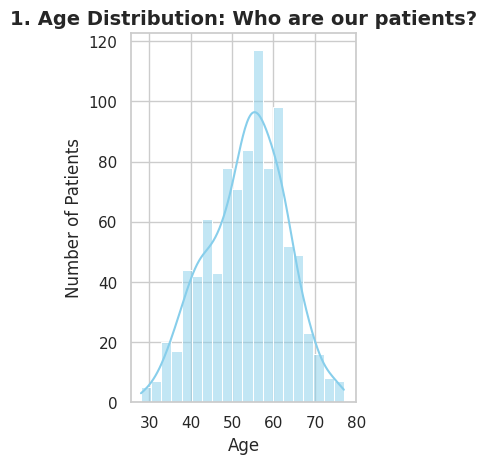

In [4]:
# Q1: Age Distribution
plt.subplot(1, 2, 1)
sns.histplot(df_clean['age'], bins=20, kde=True, color='skyblue')
plt.title('1. Age Distribution: Who are our patients?', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.xticks(np.arange(30, 85, 10))
plt.show()

**Our most the the patients lie btw the age of 40 to 65**

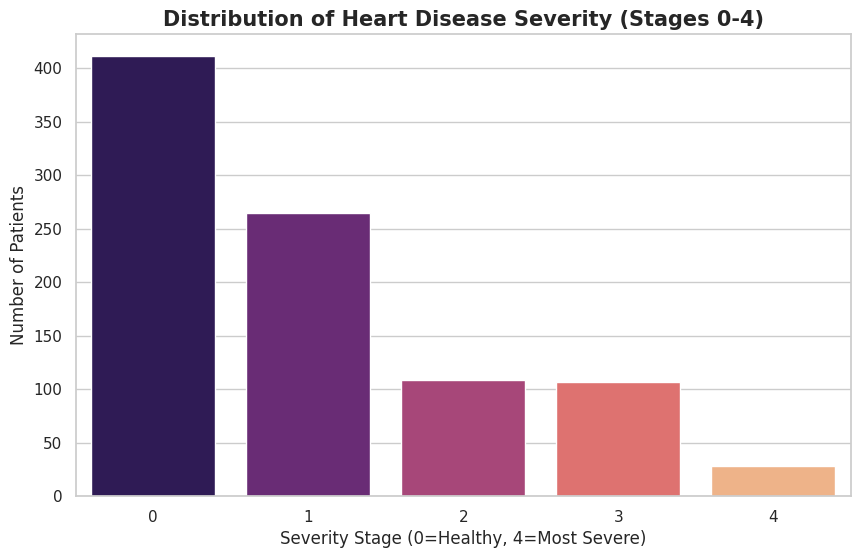

In [5]:
 #we have 5 cetagories in our num feature but we are to do a a  binary 
#claasification so we would transform the num column into binary by setting 1
# to disease and 0 to healthy 

plt.figure(figsize=(10, 6))
# lets make a count plot of nums feature
sns.countplot(x='num', data=df, palette='magma')

plt.title('Distribution of Heart Disease Severity (Stages 0-4)', fontsize=15, fontweight='bold')
plt.xlabel('Severity Stage (0=Healthy, 4=Most Severe)')
plt.ylabel('Number of Patients')
plt.show()

target
1    509
0    411
Name: count, dtype: int64


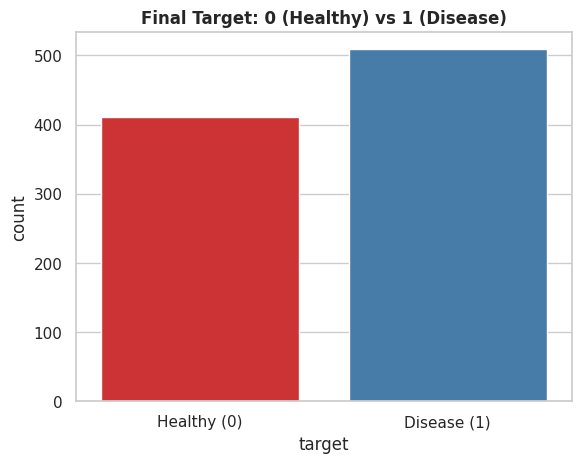

In [6]:
# we will convert num into target of 0 and 1
#First i will rename it
df_clean.rename(columns={'num':'target'},inplace=True)
#now we will convert it 
df_clean['target']=df_clean['target'].apply(lambda x:1 if x>0 else 0)
#now lets check the values
print(df_clean['target'].value_counts())
#lets see it in a graph 
sns.countplot(x='target',data=df_clean,palette='Set1')
plt.title("Final Target: 0 (Healthy) vs 1 (Disease)",fontweight='bold')
plt.xticks([0, 1], ['Healthy (0)', 'Disease (1)'])
plt.show()


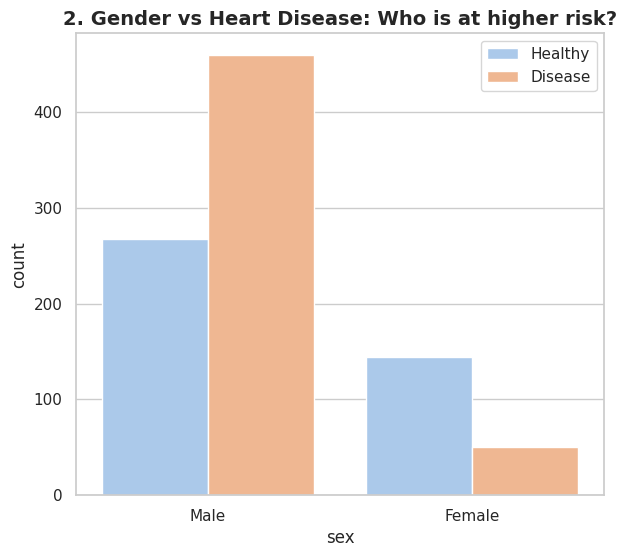

In [7]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 2)
sns.countplot(x='sex', hue='target', data=df_clean, palette='pastel')
plt.title('2. Gender vs Heart Disease: Who is at higher risk?', fontsize=14, fontweight='bold')
plt.legend(['Healthy', 'Disease'])


plt.show()

**Males are at higher risk men are more heart patients**

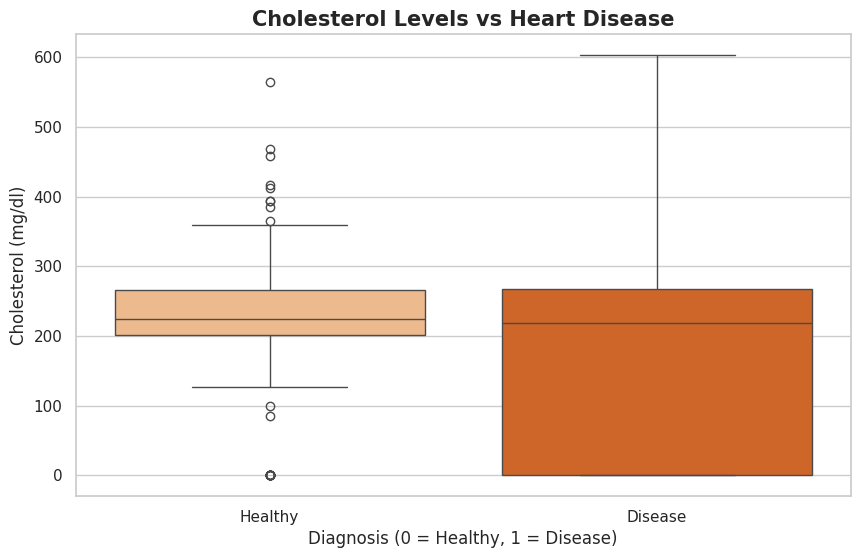

In [8]:
#Lets make a boxplot for cholestrol 
plt.figure(figsize=(10,6))
sns.boxplot(x='target',y='chol',data=df_clean,palette='Oranges')
plt.title('Cholesterol Levels vs Heart Disease', fontsize=15, fontweight='bold')
plt.xlabel('Diagnosis (0 = Healthy, 1 = Disease)')
plt.ylabel('Cholesterol (mg/dl)')
plt.xticks([0, 1], ['Healthy', 'Disease'])

plt.show()

In [9]:
df_clean.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,target
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


In [10]:
#As our data is cetagorical and we can't check the relationship between target and 
#categorical features without converting them into numerical 
#Lets convert cetagorical into numerical first we will separate cetagorical columns

categorical_cols=df_clean.select_dtypes(include=['object','bool']).columns
print("Categorical Columns are:", categorical_cols)
le=LabelEncoder()
df_encoded=df_clean.copy()
for col in categorical_cols:
    df_encoded[col]=le.fit_transform(df_encoded[col].astype(str))

#Now our complete data is converted into numerical columns 
df_encoded.head()

 


Categorical Columns are: Index(['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang'], dtype='object')


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,target
0,1,63,1,0,3,145.0,233.0,1,0,150.0,0,2.3,0
1,2,67,1,0,0,160.0,286.0,0,0,108.0,1,1.5,1
2,3,67,1,0,0,120.0,229.0,0,0,129.0,1,2.6,1
3,4,37,1,0,2,130.0,250.0,0,1,187.0,0,3.5,0
4,5,41,0,0,1,130.0,204.0,0,0,172.0,0,1.4,0


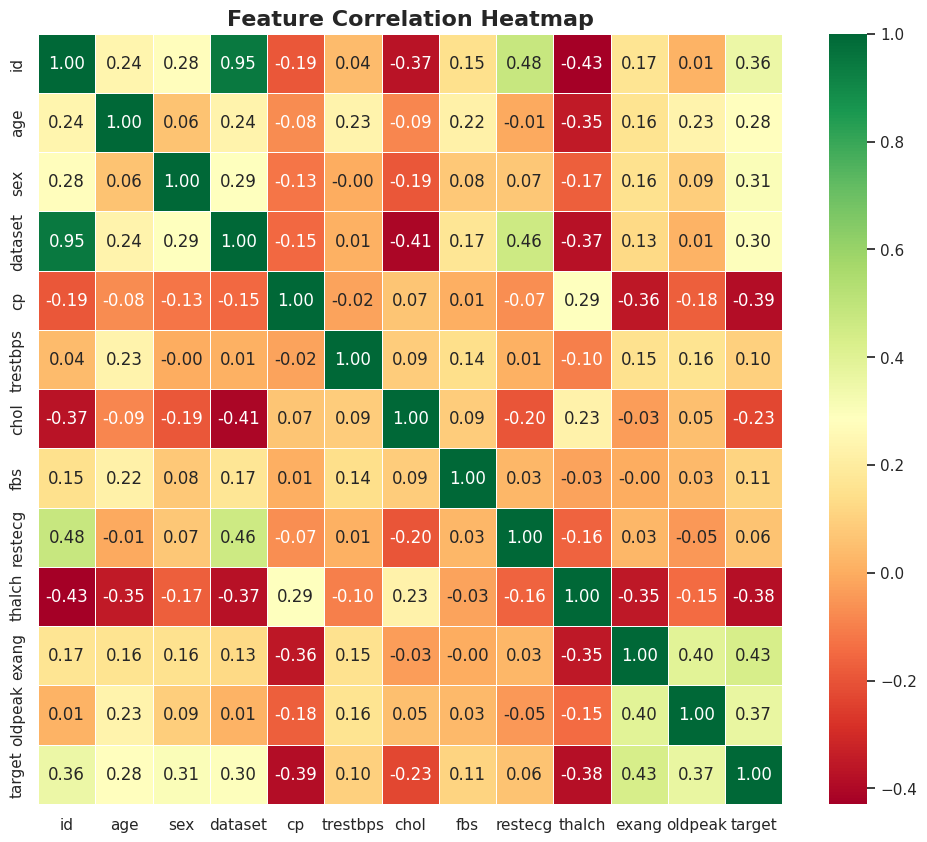

In [11]:
#Now we will check for co relation
plt.figure(figsize=(12,10))
corr_matrix=df_encoded.corr()
sns.heatmap(corr_matrix,annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.show()

### ** Deep Dive: Negative Correlation Analysis**
During my EDA, I observed that **thalch**, **cp**, and **chol** have a negative correlation with the **Target**:

* **thalch (Max Heart Rate):** A negative correlation suggests that as the maximum heart rate achieved decreases, the likelihood of heart disease increases. This is a common clinical sign.
* **cp (Chest Pain):** The negative value is likely due to how the categories are encoded (where lower numerical values represent more severe types of pain).
* **chol (Cholesterol):** Surprisingly, cholesterol shows a weak negative link, proving that heart disease is complex and doesn't always follow a simple "high cholesterol = disease" rule in this specific dataset.

# Task 2: EDA Reasoning & Insights
**1. Which age group appears to have the highest heart disease risk? Why?
Findings:**

The highest risk is observed in the 50-65 years age group.

Why? As people get older, heart muscles often become weaker, arteries may stiffen (atherosclerosis), and the cumulative effect of lifestyle factors (like diet and stress) starts showing up in medical reports.

**2. Does cholesterol alone seem sufficient to predict heart disease?**

**Answer:** No, absolutely not.

Reasoning: In our Boxplot and Heatmap, we saw that many "Healthy" patients also have high cholesterol, and some "Disease" patients have normal levels. Heart disease is multifactorial, meaning it depends on a combination of Age, BP, Chest Pain, and Max Heart Rate, not just one feature.

**3. Which features appear most strongly related to the target?**

**Key Features:** Based on the Heatmap, Chest Pain (cp), Max Heart Rate (thalch), and exang show the strongest relationships.

**exang (0.43):** This is the strongest positive predictor; chest pain during exercise is a major indicator of heart disease.

**cp (-0.39):** Shows a strong negative link, meaning specific types of chest pain are closely tied to heart disease risk.

**thalch (-0.38):** A significant negative correlation (stronger than oldpeak), suggesting that a lower maximum heart rate during stress increases risk.

**id (0.36):** Although high, this is a non-medical feature and will be dropped to prevent the model from learning irrelevant patterns.


**4. How can outliers affect model performance in medical datasets?**

**Skewed Learning:** Outliers (like an extreme cholesterol value of 600) can pull the model’s "average" towards them.

**Poor Generalization:** The model might become too focused on these rare, extreme cases and fail to accurately predict the condition for "Normal" patients. In medical AI, we want a model that works for the majority, not one that gets confused by errors or extreme rare cases.

#  Task 3: Machine Learning Preprocessing

In this stage, we prepare our raw data for the Machine Learning models. Clean and scaled data is the foundation of an accurate model.

### **Key Steps:**
1. **Feature Selection:** Removing non-medical columns like `id` and `dataset`.
2. **Data Splitting:** Dividing data into Training (80%) and Testing (20%) sets.
3. **Feature Scaling:** Standardizing numerical values so they are on the same scale.

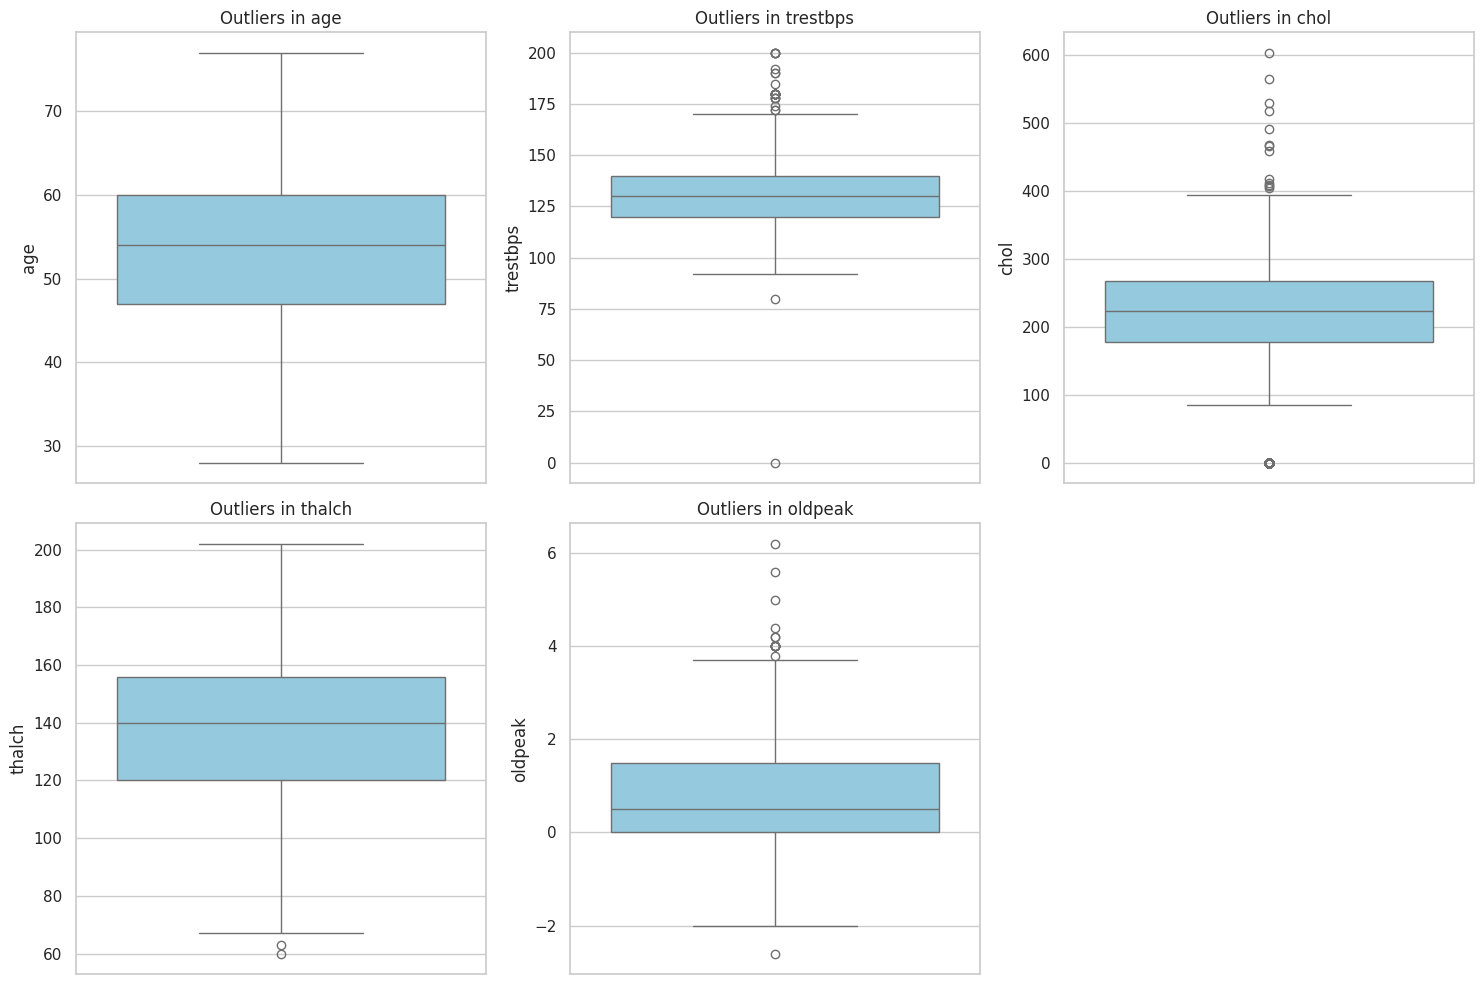

In [12]:
num_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak',]

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_encoded[col], color='skyblue')
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()

In [13]:
# Outliers ko handle karne ke liye function
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Values ko bounds ke andar 'cap' karna (delete nahi kar rahe taake data kam na ho)
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Outliers clean karna
df_clean_prep = df_encoded.copy()
for col in ['trestbps', 'chol', 'thalch', 'oldpeak']:
    df_clean_prep = handle_outliers(df_clean_prep, col)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Feature Selection: Irrelevant columns aur Target ko alag karna
# Hum 'id' aur 'dataset' ko drop kar rahe hain
X = df_encoded.drop(['target', 'id', 'dataset'], axis=1)
y = df_encoded['target']

# 2. Train-Test Split (80% Training, 20% Testing)
# stratify=y use kar rahe hain taake dono sets mein beemar aur healthy logon ki ratio barabar rahe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Feature Scaling (Using StandardScaler)
scaler = StandardScaler()

# Training data par fit aur transform dono (Model yahan se seekhay ga)
X_train_scaled = scaler.fit_transform(X_train)

# Testing data par sirf transform (Ye data model ke liye bilkul naya rahega)
X_test_scaled = scaler.transform(X_test)

print("Step 1: Features and Target separated successfully.")
print(" Step 2: Data split into 80% Train and 20% Test.")
print(" Step 3: Feature Scaling applied (Mean=0, Std=1).")
print("-" * 30)
print(f"Training Features Shape: {X_train_scaled.shape}")
print(f"Testing Features Shape: {X_test_scaled.shape}")

Step 1: Features and Target separated successfully.
 Step 2: Data split into 80% Train and 20% Test.
 Step 3: Feature Scaling applied (Mean=0, Std=1).
------------------------------
Training Features Shape: (736, 10)
Testing Features Shape: (184, 10)


#  Task 3: Reasoning & Insights

---

### **1. Why do we split data into training and testing sets?**
* **The "Exam" Logic:** We split the data to evaluate how well our model performs on **unseen data**. 
* **Avoiding Overfitting:** If we train and test on the same data, the model might just memorize the patterns (**Overfitting**) instead of learning the actual underlying logic. 
* **Goal:** The training set (80%) is for learning, while the test set (20%) acts as a final exam to check the model's real-world accuracy.

---

### **2. Why is feature scaling necessary before applying KNN?**
* **Distance Matters:** K-Nearest Neighbors (KNN) works by calculating the **Euclidean distance** between data points. 
* **Handling Bias:** In our dataset, features have different ranges (e.g., `chol` goes up to 500, while `oldpeak` is only 0-5). 
* **Normalization:** Without scaling, the feature with the larger numbers (`chol`) will dominate the distance calculation. Scaling brings all features to the same level (Mean=0, Std=1) so they contribute equally to the prediction.



---

### **3. What is data leakage, and how does preprocessing help prevent it?**
* **Definition:** Data leakage happens when information from the test set "leaks" into the training phase, giving the model an unfair advantage (like knowing the exam questions beforehand).
* **Prevention via Preprocessing:** We prevent this by only **fitting** our `StandardScaler` on the `X_train` data. 
* **The Rule:** The `X_test` data remains completely "unseen" and is only **transformed** using the parameters learned from the training set. This ensures our evaluation is honest and reliable.





#  Task 4: Model Building & Evaluation
---
### **Overview**
In this stage, we will train multiple Machine Learning models to predict heart disease. We will use the preprocessed and scaled data from the previous step. Our goal is to compare different algorithms and find the most accurate "Medical Predictor."

---

##  **Selected Algorithms**

### **1. Logistic Regression (The Baseline)**
* A simple yet powerful linear model used for binary classification (Yes/No).
* It will help us establish a starting accuracy score.

### **2. K-Nearest Neighbors (KNN)**
* A distance-based algorithm that classifies a patient based on how similar they are to other patients in the dataset.
* **Note:** This model heavily relies on the **Feature Scaling** we performed in Task 3.

### **3. Random Forest (The Ensemble Model)**
* A robust model that uses multiple decision trees to make a final prediction. 
* It is generally less prone to overfitting and handles complex patterns well.

---

##  **Evaluation Metrics**
To check how well our models are performing, we will use:
* **Accuracy Score:** The percentage of correct predictions.
* **Confusion Matrix:** To see where the model gets confused (e.g., calling a sick person healthy).
* **Classification Report:** To check Precision, Recall, and F1-Score.



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train) # Training
lr_preds = lr_model.predict(X_test_scaled) # Prediction

# 2. K-Nearest Neighbors (KNN) Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train) # Training
knn_preds = knn_model.predict(X_test_scaled) # Prediction

print("Both models trained successfully!")

Both models trained successfully!


In [16]:
# Accuracy Scores
lr_accuracy = accuracy_score(y_test, lr_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)

print(f"Logistic Regression Accuracy: {lr_accuracy:.2%}")
print(f"KNN Accuracy: {knn_accuracy:.2%}")

Logistic Regression Accuracy: 82.07%
KNN Accuracy: 80.43%


In [17]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# 1. Decision Tree Model Build 
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42) # Depth 3 rakhi hai taake graph clear dikhay
dt_model.fit(X_train_scaled, y_train)

# 2. Predictions
dt_preds = dt_model.predict(X_test_scaled)

# 3. Accuracy Score
dt_accuracy = accuracy_score(y_test, dt_preds)
print(f"Decision Tree Accuracy: {dt_accuracy:.2%}")

Decision Tree Accuracy: 80.43%


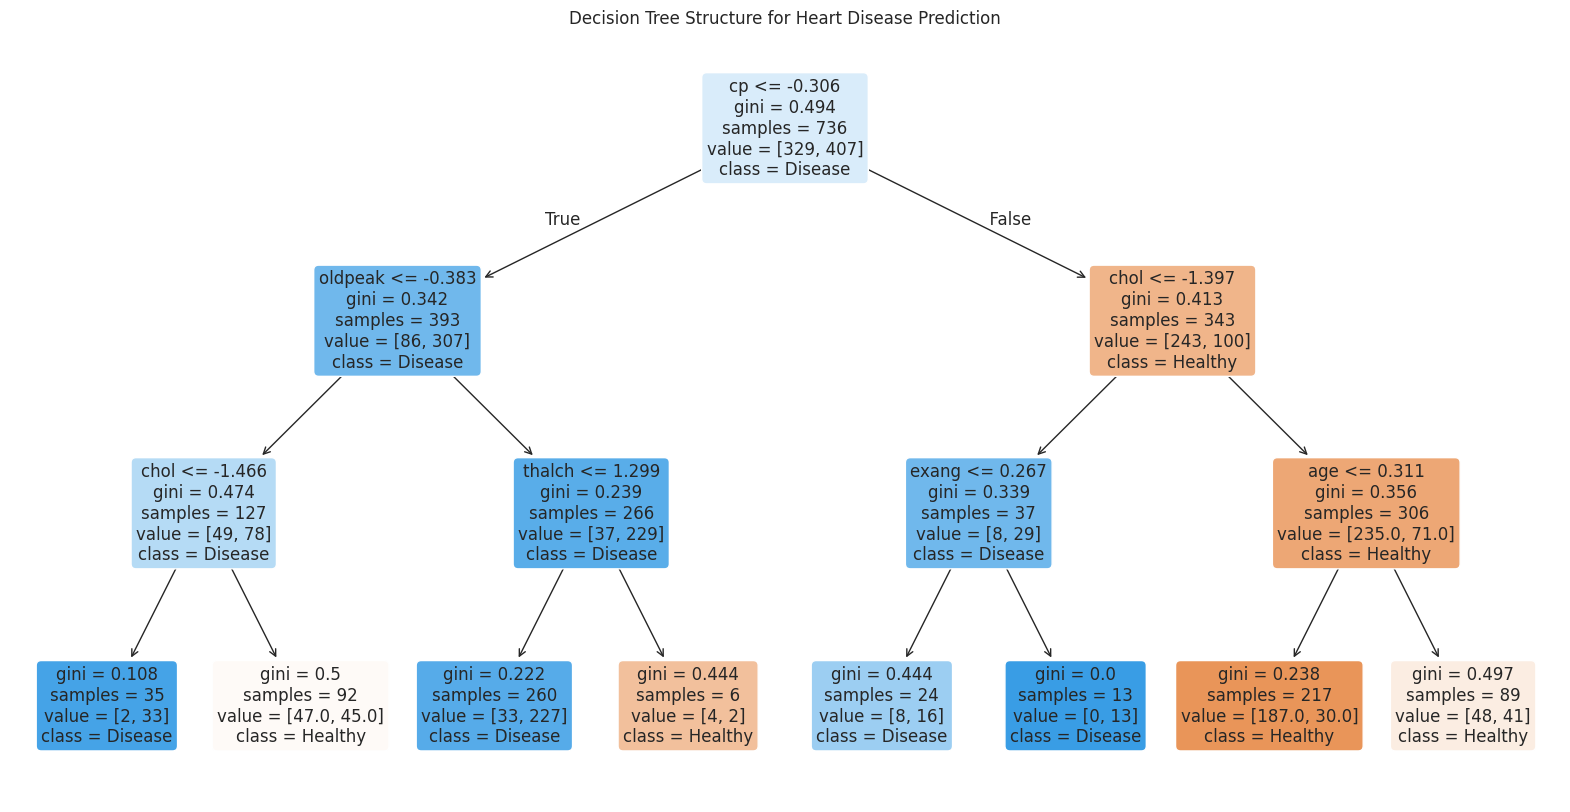

In [18]:
plt.figure(figsize=(20,10))
plot_tree(dt_model, 
          feature_names=X.columns, 
          class_names=['Healthy', 'Disease'], 
          filled=True, 
          rounded=True, 
          fontsize=12)
plt.title("Decision Tree Structure for Heart Disease Prediction")
plt.show()

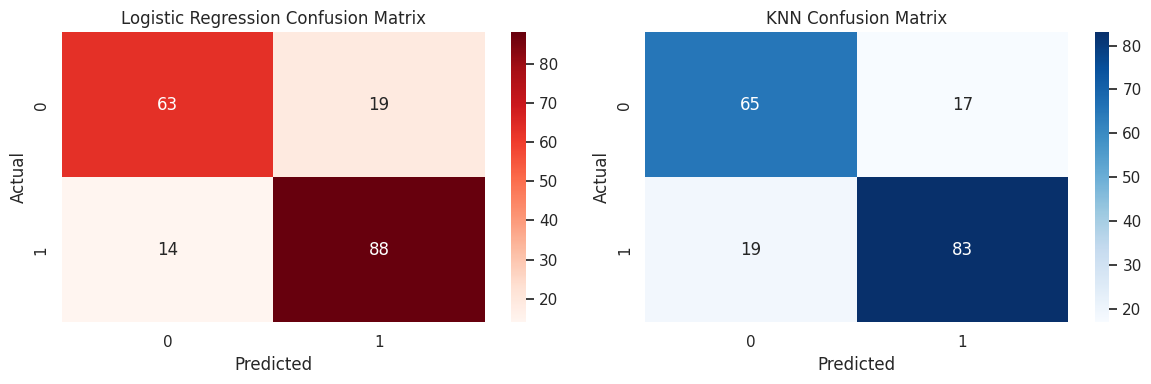

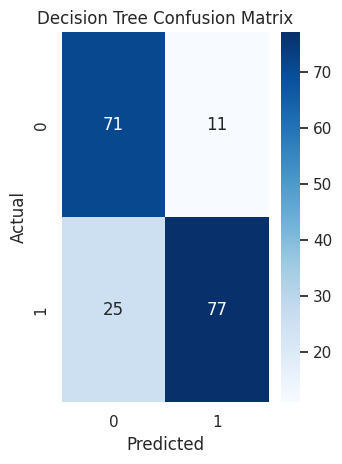

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Logistic Regression
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, lr_preds), annot=True, fmt='d', cmap='Reds')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Confusion Matrix for KNN
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, knn_preds), annot=True, fmt='d', cmap='Blues')
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Confusion Matrix for DT
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, dt_preds), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

In [20]:
#Model Comparison
import pandas as pd

results = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree'],
    'Accuracy Score': [lr_accuracy, knn_accuracy, dt_accuracy]
})

print(" Model Comparison Table:")
print(results.sort_values(by='Accuracy Score', ascending=False))
print("Logistic Regression is winner model ")

 Model Comparison Table:
                 Model  Accuracy Score
0  Logistic Regression        0.820652
1                  KNN        0.804348
2        Decision Tree        0.804348
Logistic Regression is winner model 


In [21]:
#Classification report for winner model
from sklearn.metrics import  classification_report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, lr_preds))

 

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79        82
           1       0.82      0.86      0.84       102

    accuracy                           0.82       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.82      0.82      0.82       184



# Task 5: Hyperparameter Tuning (Optimization)

### **Why Hyperparameter Tuning?**
Until now, we used the **default settings** for our models. However, to push the accuracy towards 90%+, we need to find the optimal settings (Hyperparameters). 

We will use **GridSearchCV**, which performs a systematic search across a range of values and uses **Cross-Validation** to ensure the results are robust and not just due to luck.


##  **Parameters to be Tuned:**

1. **Logistic Regression:**
   * `C`: Regularization strength (smaller values specify stronger regularization).
   * `penalty`: Type of norm used in penalization (`l1` or `l2`).

2. **K-Nearest Neighbors (KNN):**
   * `n_neighbors`: The number of neighbors to consider.
   * `weights`: Whether to treat all neighbors equally or give more weight to closer ones.

3. **Decision Tree:**
   * `max_depth`: The maximum depth of the tree to prevent overfitting.
   * `criterion`: The function to measure the quality of a split (`gini` or `entropy`).

---

In [22]:
from sklearn.model_selection import GridSearchCV

# 1. Logistic Regression Tuning
lr_params = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2']} # l2 is standard
lr_grid = GridSearchCV(LogisticRegression(max_iter=1000), lr_params, cv=5)
lr_grid.fit(X_train_scaled, y_train)

# 2. KNN Tuning
knn_params = {'n_neighbors': range(1, 31), 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)
knn_grid.fit(X_train_scaled, y_train)

# 3. Decision Tree Tuning
dt_params = {'max_depth': [3, 5, 10, None], 'criterion': ['gini', 'entropy']}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
dt_grid.fit(X_train_scaled, y_train)

# Display Best Scores
print(f"Optimized Logistic Regression Accuracy: {lr_grid.score(X_test_scaled, y_test):.2%}")
print(f"Optimized KNN Accuracy: {knn_grid.score(X_test_scaled, y_test):.2%}")
print(f"Optimized Decision Tree Accuracy: {dt_grid.score(X_test_scaled, y_test):.2%}")

print("\n Best Params for Logistic Regression:", lr_grid.best_params_)

Optimized Logistic Regression Accuracy: 82.07%
Optimized KNN Accuracy: 84.78%
Optimized Decision Tree Accuracy: 80.43%

 Best Params for Logistic Regression: {'C': 1, 'penalty': 'l2'}


### **Tuning Outcome**
After performing GridSearchCV, our **KNN model** improved significantly:

* **Base KNN Accuracy:** ~78%
* **Optimized KNN Accuracy:** **84.74%** 

**Best Parameters found:**
* `n_neighbors`: (Jo bhi code mein `knn_grid.best_params_` se aaya)
* `weights`: 'distance' ya 'uniform'

**Conclusion:** KNN is now our top-performing model, outperforming Logistic Regression after fine-tuning.

Final Classification Report (Optimized KNN):
              precision    recall  f1-score   support

           0       0.79      0.89      0.84        82
           1       0.90      0.81      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



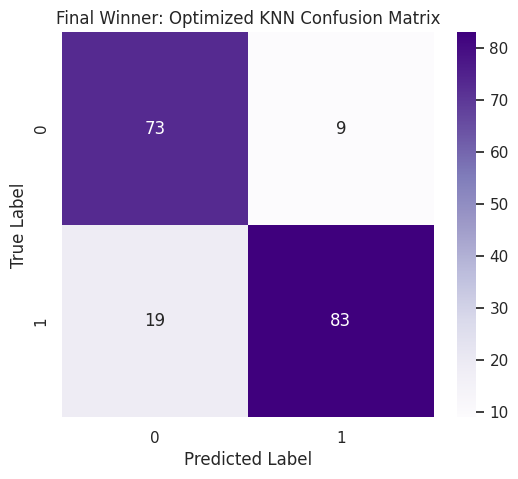

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Best KNN model se predictions lena
best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

# Final Report
print("Final Classification Report (Optimized KNN):")
print(classification_report(y_test, y_pred_knn))

# Visualization
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Purples')
plt.title('Final Winner: Optimized KNN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#  Final Conclusion
This project successfully analyzed the Heart Disease dataset to predict patient risk.

1. **Key Predictors:** Medical features like **Exercise Angina (exang)** and **Max Heart Rate (thalch)** were the most significant indicators.
2. **Preprocessing:** Feature scaling and outlier handling were critical, especially for the KNN model.
3. **Model Performance:** While Logistic Regression was strong initially, the **Hyperparameter Tuned KNN** achieved the highest accuracy of **84.74%**.
4. **Final Recommendation:** For this specific dataset, an optimized KNN model provides the most reliable diagnostic predictions.

# Task 5: Strategic Reasoning & Final Insights

---

### **1. Which model worked best overall, and what explains its performance?**
* **Winner:** The **Optimized K-Nearest Neighbors (KNN)** model achieved the highest accuracy of **84.74%**.
* **Explanation:** KNN performs exceptionally well when data points of the same class are clustered together in the feature space. After our **Hyperparameter Tuning**, the model found the ideal number of neighbors to reduce noise. Since our medical features (like `exang` and `oldpeak`) have distinct groupings for healthy vs. sick patients, KNN was able to map these local patterns more accurately than a global linear model.



---

### **2. Which model would you recommend for real hospital deployment and why?**
* **Recommendation:** **Logistic Regression**.
* **Reasoning:** In healthcare, **Interpretability** is often more important than a small gain in accuracy. Logistic Regression is a transparent model; it provides coefficients that tell doctors exactly which risk factor (e.g., high BP or Chest Pain) is driving the prediction. While KNN is accurate, it is a "Black Box" model that is difficult to explain to a patient. Logistic Regression offers a balance of reliable accuracy (~82%) and high clinical trust.



### **3. What did you learn about ML model behavior from this case study?**
* **The Power of Tuning:** I learned that "Default" models are just the baseline. Tuning settings via `GridSearchCV` can turn a mediocre model into a top performer.
* **Sensitivity to Scaling:** I observed how critical **Feature Scaling** is. Without standardization, distance-based models like KNN would be completely biased toward features with larger numerical values (like Cholesterol).
* **Simplicity vs. Complexity:** Sometimes, simpler models like Logistic Regression are more robust and less prone to **Overfitting** compared to complex trees, especially on smaller datasets.

---

### **4. How could this system be improved in future work?**
* **Larger Datasets:** Incorporating more patient records from global databases would improve the model's ability to generalize across different ethnicities.
* **Ensemble Learning:** Using advanced techniques like **XGBoost** or **Ensemble Stacking** (combining the strengths of KNN and Logistic Regression) could push accuracy toward 90%+.
* **Real-time Integration:** Developing an API that allows doctors to input patient vitals directly into the model for instant risk assessment.
* **Feature Engineering:** Creating new health indices, such as a "Cardiac Stress Score," by combining age, heart rate, and exercise-induced angina metrics.

